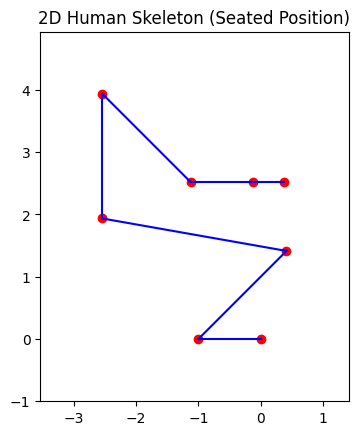

A (Horizontal distance): 2.91 units
B (Vertical distance): 2.52 units


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_joint_positions(dimensions, angles):
    # Initialize the list of joints with the first joint (origin of the foot) at the origin
    joints = [(0, 0)]  # starting point for the foot
    
    # Iterate through each body part to calculate the next joint position
    for i in range(len(dimensions)):
        # Extract the current joint position, length of the current body part, and angle
        x_prev, y_prev = joints[-1]
        length = dimensions[i]
        angle = angles[i]
        
        # Calculate the new joint position using trigonometry
        x_new = x_prev + length * np.cos(np.radians(angle))
        y_new = y_prev + length * np.sin(np.radians(angle))
        
        # Add the new joint position to the list of joints
        joints.append((x_new, y_new))
    
    return joints

def plot_skeleton(joints):
    # Plot the skeleton using the joints
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')
    
    # Plot the body parts as lines between joints
    for i in range(1, len(joints)):
        x_values = [joints[i-1][0], joints[i][0]]
        y_values = [joints[i-1][1], joints[i][1]]
        ax.plot(x_values, y_values, color='blue')  # Plot lines between joints
    
    # Plot dots at each joint
    joint_x, joint_y = zip(*joints)  # Unzip the x and y coordinates of the joints
    ax.scatter(joint_x, joint_y, color='red')  # Plot the joints as dots
    
    # Adjust the plot limits dynamically to fit all joints
    x_min = min(joint_x) - 1
    x_max = max(joint_x) + 1
    y_min = min(joint_y) - 1
    y_max = max(joint_y) + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    plt.title("2D Human Skeleton (Seated Position)")
    plt.show()

def calculate_distances(joints):
    # A: Horizontal distance between the free end of the hand and the joint connecting the thigh to the torso
    hand_x, hand_y = joints[-1]
    torso_x, torso_y = joints[3]
    distance_A = abs(hand_x - torso_x)
    
    # B: Vertical distance between the free end of the foot and the free end of the hand
    foot_x, foot_y = joints[0]
    distance_B = abs(hand_y - foot_y)
    
    return distance_A, distance_B

# Example input values:
# Lengths of the body parts
dimensions = [1, 2, 3, 2, 2, 1, 0.5]  # foot, lower leg, thigh, torso, upper arm, forearm, hand
# Angles between the body parts (in degrees)
angles = [180, 45, 170, 90, -45, 0, 0]  # foot is now horizontal to the left (180 degrees), other angles are relative to previous body parts

# Calculate joint positions
joints = calculate_joint_positions(dimensions, angles)

# Plot the skeleton
plot_skeleton(joints)

# Calculate the required distances
distance_A, distance_B = calculate_distances(joints)

# Output the distances
print(f"A (Horizontal distance): {distance_A:.2f} units")
print(f"B (Vertical distance): {distance_B:.2f} units")